```
  少年不知愁滋味，為賦新詞強說愁
  馬齒漸長力不滯，程式編碼空徒勞
               -- 切特•基匹梯
```

In [1]:
!pip install pyecharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load webpage resource
url='../../../Desktop/cgu_lecture.html'
url="cgu_lecture.html"
pages=pd.read_html(url)

In [4]:
# Find out where the table we want
cgu=pages[12]

In [5]:
# copy whole the table except the columns of features
df=cgu[1:]

In [6]:
# reset columns of DataFrame 
df.columns=cgu.loc[0,:].values

In [7]:
df.reset_index(inplace=True)
df

,index,學年/學期 Semester,科目代號 Course Code,開課序號 Serial No.,開課單位 Department,年級 Year,課程名稱 Course Title,授課教師 Instructor,學分 Credits,上課時間 Class Sched.,選課人數 Seats
0,1,112/ 1,GA0001,58980,通識中心,1,從急救案例到人生省思 Reflection of Life from First Aid c...,牟永平,2,Thu 10:10-12:00,60/60
1,2,112/ 1,GA0002,58981,通識中心,1,"創新、創意、創業開發課程 Innovation, creativity, and entre...",王永樑,2,Thu 10:10-12:00,52/60
2,3,112/ 1,GA0003,58982,通識中心,1,龜山區稻米產業多元化-清酒釀造 Diversify rice industry in Gui...,何金龍,1,0 00:00-00:00,20/20
3,4,112/ 1,GA0004,58983,通識中心,1,龜山區稻米產業多元化-清酒釀造(場域) Diversify rice industry in...,何金龍,0.50,0 00:00-00:00,20/20
4,5,112/ 1,GA0006,58984,通識中心,1,服務學習與營隊活動導論2-活動規劃 Introduction to Service-Lear...,何金龍,0.40,0 00:00-00:00,31/60
...,...,...,...,...,...,...,...,...,...,...,...
153,154,112/ 1,GT0137,59877,通識中心,2,資料處理與應用 Introduction of Data Processing,李榮宗,2,Fri 10:10-12:00,40/40
154,155,112/ 1,GT0137,59878,通識中心,2,資料處理與應用 Introduction of Data Processing,陳偉忠,2,Wed 13:10-15:00,23/40
155,156,112/ 1,GT0172,59976,通識中心,1,程式語言 Programming Language,待聘教師,2,Tue 10:10-12:00,0/0
156,157,112/ 1,GT0172,59977,通識中心,1,程式語言 Programming Language,待聘教師,2,Fri 15:10-17:00,0/0


In [8]:
# retrieve the number of person registered for each lecture
df['num']=0
for i in range(0,len(df)):
    # retireve the number before "/"
    df['num'][i]=df['選課人數 Seats'].iloc(0)[i].split('/')[0]
df[:4] 

<ipython-input-8-0a52be777bc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num']=0
<ipython-input-8-0a52be777bc3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'][i]=df['選課人數 Seats'].iloc(0)[i].split('/')[0]


,index,學年/學期 Semester,科目代號 Course Code,開課序號 Serial No.,開課單位 Department,年級 Year,課程名稱 Course Title,授課教師 Instructor,學分 Credits,上課時間 Class Sched.,選課人數 Seats,num
0,1,112/ 1,GA0001,58980,通識中心,1,從急救案例到人生省思 Reflection of Life from First Aid c...,牟永平,2,Thu 10:10-12:00,60/60,60
1,2,112/ 1,GA0002,58981,通識中心,1,"創新、創意、創業開發課程 Innovation, creativity, and entre...",王永樑,2,Thu 10:10-12:00,52/60,52
2,3,112/ 1,GA0003,58982,通識中心,1,龜山區稻米產業多元化-清酒釀造 Diversify rice industry in Gui...,何金龍,1,0 00:00-00:00,20/20,20
3,4,112/ 1,GA0004,58983,通識中心,1,龜山區稻米產業多元化-清酒釀造(場域) Diversify rice industry in...,何金龍,0.50,0 00:00-00:00,20/20,20


In [9]:
df['num']=df['num'].astype(int)

<ipython-input-9-c16724e25856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num']=df['num'].astype(int)


In [10]:
import seaborn as sns
sns.set()

%matplotlib inline

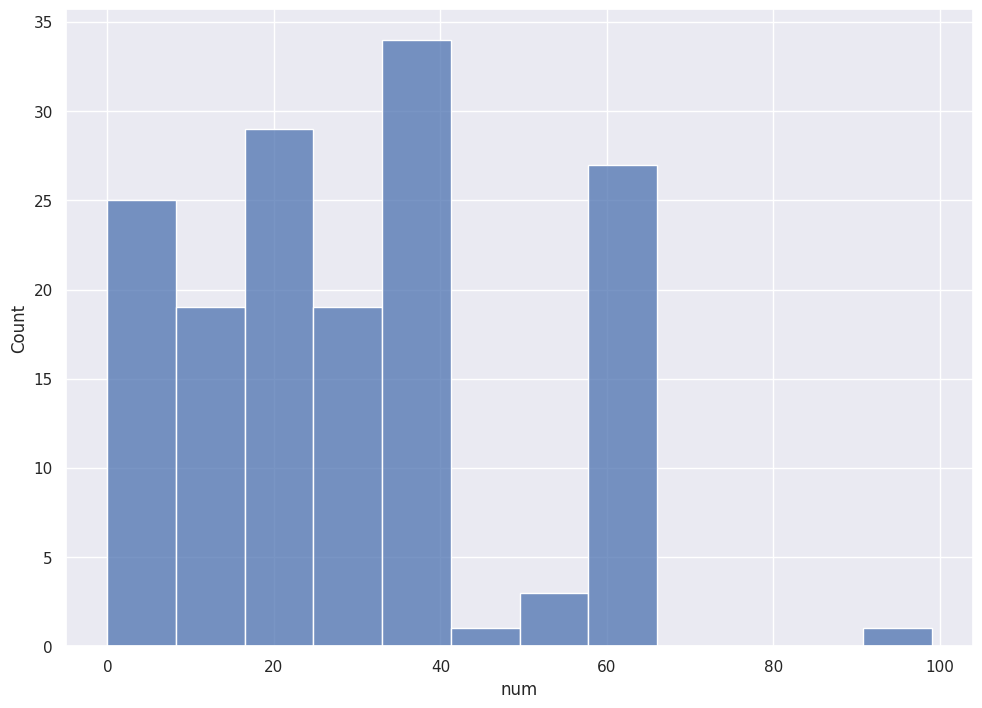

In [11]:
# First view for distributed of registers 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['num']);

In [12]:
from pyecharts.charts import Bar
from pyecharts import options as opts

In [13]:
# make a categorical feature for size od persions in registered lecture
def classify(x):
    if x<10:
       return '[0,10)'
    elif x<30:
       return '[10,30)' 
    elif x<60:
       return '[30,60)'
    else:
       return '[60,]' 

In [14]:
df['Class']=df['num'].apply(classify)

<ipython-input-14-4fa24e9e793f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class']=df['num'].apply(classify)


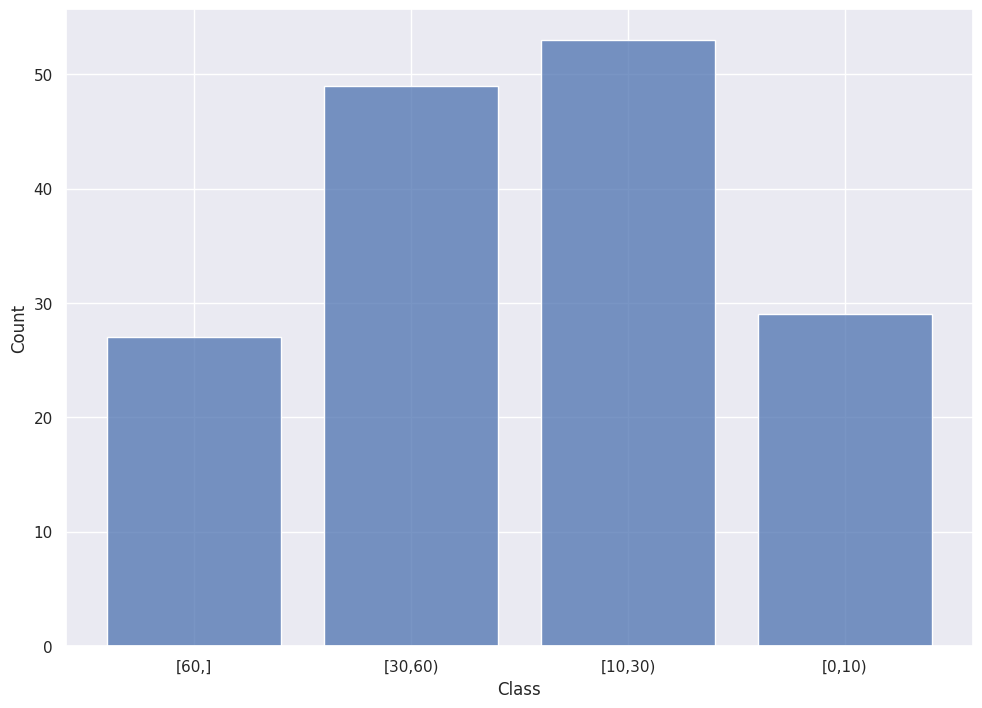

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(df['Class'],discrete=True, shrink=0.8,);

In [16]:
Class_count

NameError: ignored

In [17]:
bins=['[0,10)','[10,30)','[30,60)','[60,]']
Class_count=df[['Class']].value_counts()
count_bins=[Class_count[bin] for bin in bins]

In [ ]:
count_bins==[29, 53, 49, 27]

True

Class_dic=df[['Class']].value_counts().to_dict()

In [18]:
len(bins),len(count_bins)

(4, 4)

In [19]:
# 不习惯链式调用的开发者依旧可以单独调用方法
bar = Bar()
#bar.add_xaxis(list(Class_dic.keys()))
bar.add_xaxis(bins)
#bar.add_yaxis("選課人數", count_bins)
bar.add_yaxis("課程數目",[29, 53, 49, 27])
bar.set_global_opts(title_opts=opts.TitleOpts(
    title="通識中心 112-1 課程", subtitle='選課人數範圍'),
    #yaxis_opts=opts.AxisOpts(name="課程數"),
    xaxis_opts=opts.AxisOpts(name="選課人數"),                
    )
bar.render_notebook()

In [20]:
bar.load_javascript()

In [23]:
from IPython.display import HTML

In [24]:
HTML("render.html")

In [25]:
 [z for z in zip( bins, count_bins)]==[('[0,10)', 29), ('[10,30)', 53), ('[30,60)', 49), ('[60,]', 27)]

True

In [ ]:
Count_bins=count_bins

In [47]:
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    #.add("", [list(z) for z in zip([ z[0] for z in list(Class_dic)], list(Class_dic.values()))],
    #.add("",  [z for z in zip( bins, Count_bins)],
    .add("",[['[0,10)', 29], ['[10,30)', 53], ['[30,60)', 49], ['[60,]', 27]],        
         radius=["30%", "75%"],
         center=["35%", "50%"],
         rosetype="radius", 
        )
    .set_global_opts(title_opts=opts.TitleOpts(title="通識中心 112-1 課程", 
                                               subtitle='選課人數範圍',
                                               pos_left='left',
                                               pos_top='0%'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="人數 {b}: {c} 門"))
)
c.render()

'/content/render.html'

In [48]:
HTML("render.html")

In [28]:
# explode weekday-duration, "Thu 10:10-12:00", into "weekday" and "duration", two features
def seperate_day_time(df, feature):
    df[feature+'_day'] = df[feature].apply(lambda x: x.split(' ')[0])
    df[feature+'_time'] = df[feature].apply(lambda x: x.split(' ')[1])
    return df

In [29]:
df=seperate_day_time(df, "上課時間 Class Sched.")

<ipython-input-28-24e19ed4deb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_day'] = df[feature].apply(lambda x: x.split(' ')[0])
<ipython-input-28-24e19ed4deb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+'_time'] = df[feature].apply(lambda x: x.split(' ')[1])


In [30]:
# determine time is at morring or afternoon
def map_time(df, feature):
    df['time_slot'] = df[feature].apply(lambda x: 'morning' if x.split('-')[0] < '12:00' else 'afternoon' if x.split('-')[0] > '12:00' else 'none')
    return df

df= map_time(df, "上課時間 Class Sched._time")

<ipython-input-30-c864024e7b84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_slot'] = df[feature].apply(lambda x: 'morning' if x.split('-')[0] < '12:00' else 'afternoon' if x.split('-')[0] > '12:00' else 'none')


In [31]:
df.loc[df['上課時間 Class Sched._day']=='0','上課時間 Class Sched._day']='None'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 35506 (\N{CJK UNIFIED IDEOGRAPH-8AB2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35506 

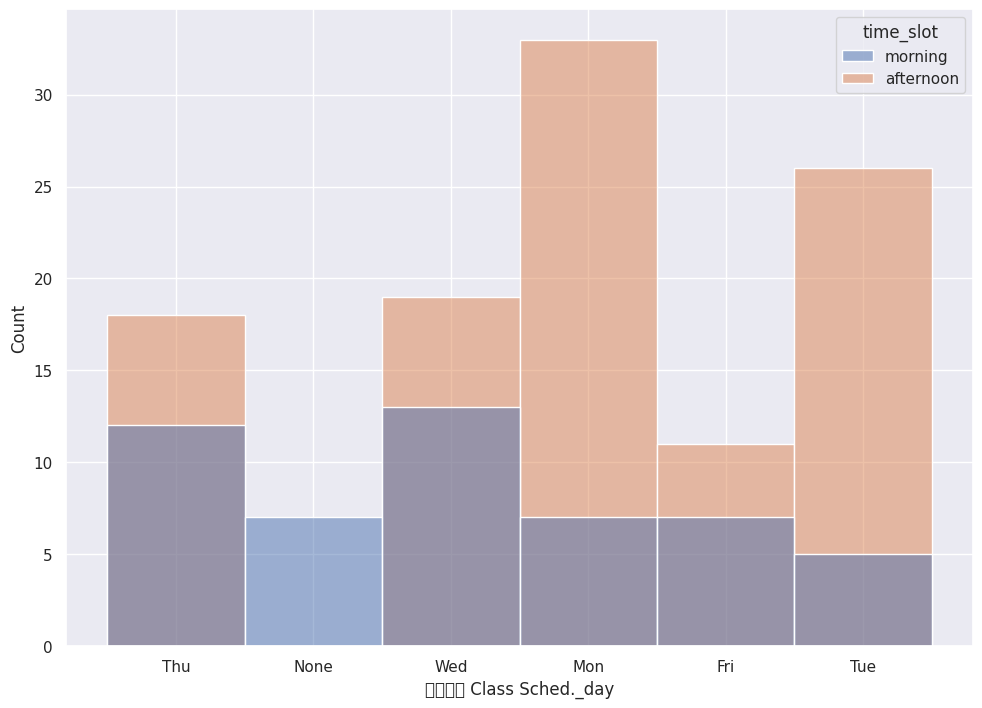

In [32]:
sns.histplot(data=df, x="上課時間 Class Sched._day", hue="time_slot");

In [33]:
person_bins=['[0,10)','[10,30)','[30,60)','[60,]']
person_count_M=df.loc[df['time_slot']=='morning']['Class'].value_counts()
person_count_A=df.loc[df['time_slot']=='afternoon']['Class'].value_counts()

person_count_bins_A=[person_count_A[bin] for bin in person_bins]
person_count_bins_M=[person_count_M[bin] for bin in person_bins]

In [34]:
person_count_bins_A,person_count_bins_M

([17, 37, 34, 19], [12, 16, 15, 8])

In [35]:
# 不习惯链式调用的开发者依旧可以单独调用方法
bar = Bar()
bar.add_xaxis(person_bins)
bar.add_yaxis(" Morning 課程數目", [12, 16, 15, 8])
bar.add_yaxis(" Afternoon 課程數目",[17, 37, 34, 19])
bar.set_global_opts(title_opts=opts.TitleOpts(title="通識中心 112-1 課程", subtitle="上下午課程 人數分布"))
#bar.render_notebook()
bar.render("render.html")

'/content/render.html'

In [36]:
HTML("render.html")

In [42]:
from pyecharts.charts import Pie

c = (
    Pie()
    #.add("", [list(z) for z in zip([ z[0] for z in list(Class_dic)], list(Class_dic.values()))],
    #.add("",  [z for z in zip( bins, Count_bins)],
    .add(" 課程選修人數, 開課總數",[['[0,10)', 29], ['[10,30)', 53], ['[30,60)', 49], ['[60,]', 27]],        
         radius=["50%", "75%"],
         center=["35%", "50%"],
         rosetype="radius", 
        )
    .add(" 上午 課程",[['[0,10)', 12], ['[10,30)', 16], ['[30,60)', 15], ['[60,]', 8]],        
         radius=["25%", "38%"],
         center=["35%", "50%"],
         #rosetype="radius", 
        )
    .add(" 下午 課程",[['[0,10)', 17], ['[10,30)', 36], ['[30,60)', 34], ['[60,]', 19]],        
         radius=["10%", "18%"],
         center=["35%", "50%"],
         #rosetype="radius", 
        )
    .set_global_opts(title_opts=opts.TitleOpts(title="通識中心 112-1 課程", 
                                               subtitle='選課人數範圍',
                                               pos_left='left',
                                               pos_top='0%'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="人數 {b}: {c} 門"))
)
c.render()

'/content/render.html'

In [43]:
HTML("render.html")

In [44]:
df1=df[df['上課時間 Class Sched._day']!='None']
weekday_bins=['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
weekday_count_M=df1.loc[df1['time_slot']=='morning']['上課時間 Class Sched._day'].value_counts()
weekday_count_A=df1.loc[df1['time_slot']=='afternoon']['上課時間 Class Sched._day'].value_counts()

weekday_count_bins_A=[weekday_count_A[bin] for bin in weekday_bins]
weekday_count_bins_M=[weekday_count_M[bin] for bin in weekday_bins]

In [45]:
bar = Bar()
bar.add_xaxis(weekday_bins)
bar.add_yaxis(" Morning 課程數目", [7, 5, 13, 12, 7])
bar.add_yaxis(" Afternoon 課程數目",[33, 26, 19, 18, 11] )
bar.set_global_opts(title_opts=opts.TitleOpts(title="通識中心 112-1 課程", subtitle="每週課程 人數分布"))
bar.render()

'/content/render.html'

In [46]:
HTML("render.html")